# Super store Data Analysis Project July 28th

In [66]:
import plotly.offline as ply
import plotly.graph_objs as go

%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

Description of the Data

Size:
51291 rows 24 columns

Row ID:

Order ID: 25035 unique values

Order Date: The date that the order was placed M-D-Y

Ship Date: The order was shipped M-D-Y

Customer ID: 

Customer Name: First+Last

Segment: Product segment

City: Where city was the order shipped to

State: Where state was the order shipped to

Country:Where country was the order shipped to

Postal Code: contains a lot of missing values

Market: the market that the product was sold

Product ID: ID number

Category: Product category

Sub_category: Product Sub Category

Product Name: name, product description

Sales: Sales Amount for a particular order

Quantity: Quantity of the product

Discount: the percentage off

Profit: Profit for a particular order

Shipping Cost: shipping fee

Order Priority: 

# Data Exploration

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
data=pd.read_csv("superstore_dataset2011-2015_copy.csv",encoding = "ISO-8859-1")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/11,6/1/11,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/11,8/1/11,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/11,5/1/11,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/11,5/1/11,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/11,8/1/11,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

In [7]:
# Missing Values
post_missing=data["Postal Code"].isnull().sum()
print("The Postal Code Column has", post_missing , "missing values.")

The Postal Code Column has 41296 missing values.


In [8]:
# Delete Postal Code Column
data=data.drop(columns=['Postal Code'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping Cost     51290 non-null float64
Order Pri

In [9]:
# Replace column names using underscore
data.columns=data.columns.str.replace(" ", "_")
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,42433,AG-2011-2040,1/1/11,6/1/11,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/11,8/1/11,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/11,5/1/11,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/11,5/1/11,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/11,8/1/11,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [10]:
# Convert orderdate to datetime
from datetime import datetime
data["Order_Date"]=pd.to_datetime(data["Order_Date"])

#Convert shipping date
data["Ship_Date"]=pd.to_datetime(data["Ship_Date"])

In [11]:
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [12]:
data.describe()

,Row_ID,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# Total Sales by Year/Month

In [13]:
Year=data["Order_Date"].dt.year
Profit_Sales_by_Year=data.groupby(Year).agg({"Profit":sum,"Sales":sum}).reset_index()
Profit_Sales_by_Year

,Order_Date,Profit,Sales
0,2011,248940.81154,2.259451e+06
1,2012,307415.27910,2.677439e+06
2,2013,406935.23018,3.405746e+06
3,2014,504165.97046,4.299866e+06


Text(0, 0.5, 'Total Sales')

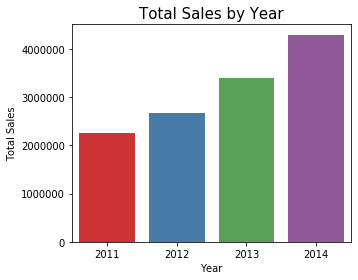

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.barplot(x="Order_Date", y='Sales',
            data=Profit_Sales_by_Year, 
            palette="Set1",
            estimator=sum)
plt.title("Total Sales by Year", fontsize=15)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Total Sales", fontsize=10)

In [15]:
# Total Sales by Month
Month=data["Order_Date"].dt.month
Monthly_sale_profit=data.groupby(Month).agg({"Sales":sum, "Profit":sum}).reset_index().sort_values("Sales")
Monthly_sale_profit

,Order_Date,Sales,Profit
1,2,7.228532e+05,96425.03602
0,1,7.757669e+05,90584.80272
6,7,8.387436e+05,85827.65364
3,4,8.516173e+05,95927.05920
2,3,9.513331e+05,123893.00142
4,5,9.764157e+05,111031.76714
9,10,1.120777e+06,138733.88830
5,6,1.152368e+06,144458.78866
8,9,1.244140e+06,128737.11324
7,8,1.247501e+06,135583.35630


Text(0, 0.5, 'Total Sales')

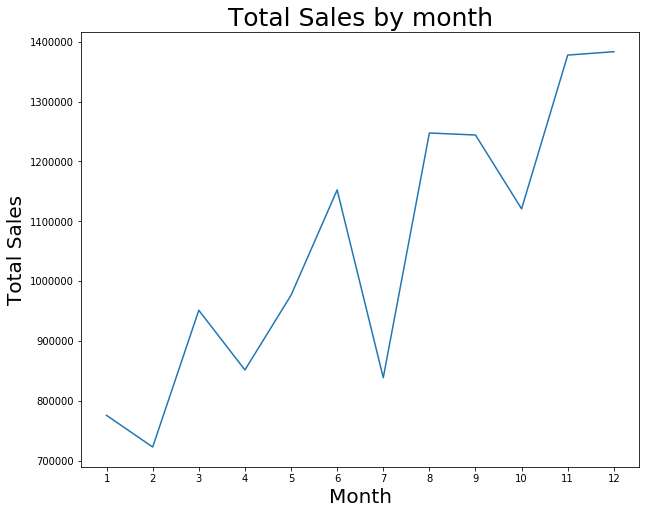

In [16]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Order_Date", y="Sales", data=Monthly_sale_profit)
plt.title("Total Sales by month", fontsize=25)
plt.xlabel("Month", fontsize=20)
plt.xticks(Monthly_sale_profit["Order_Date"])
plt.ylabel("Total Sales", fontsize=20)

# Total Profit by Year/month

Text(0, 0.5, 'Total Profit')

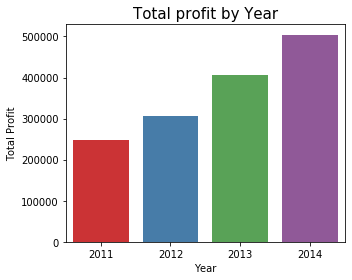

In [17]:
#total sales by year
plt.figure(figsize=(5,4))
sns.barplot(x="Order_Date", y="Profit", data=Profit_Sales_by_Year,
           palette="Set1")

plt.title("Total profit by Year", fontsize=15)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Total Profit", fontsize=10)

Text(0, 0.5, 'Total Profit')

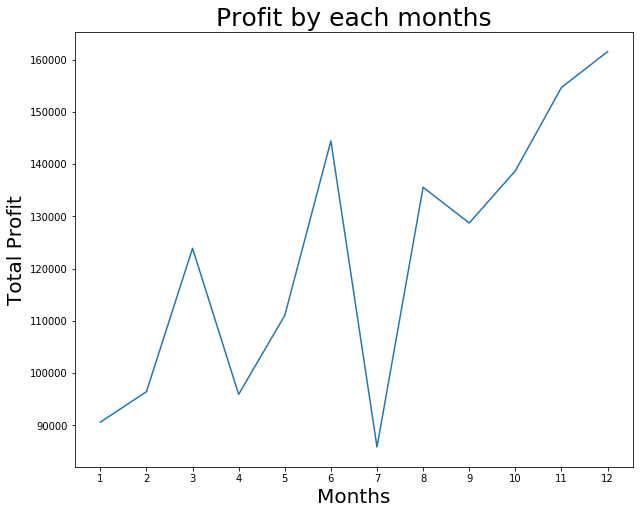

In [18]:
# total profit by month
plt.figure(figsize=(10,8))
sns.lineplot(x="Order_Date",y="Profit", data=Monthly_sale_profit)
plt.xticks(Monthly_sale_profit["Order_Date"])
plt.title("Profit by each months",fontsize=25)
plt.xlabel("Months",fontsize=20)
plt.ylabel("Total Profit", fontsize=20)

# Market

In [19]:
# how many distinct market?
data["Market"].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [20]:
market_sales_profit=data.groupby("Market").agg({"Sales":sum, "Profit":sum}).reset_index()


In [21]:
market_sales_profit['profit_rate']=market_sales_profit["Profit"]/market_sales_profit["Sales"]
market_sales_profit

,Market,Sales,Profit,profit_rate
0,APAC,3.585744e+06,436000.04900,0.121593
1,Africa,7.837732e+05,88871.63100,0.113389
2,Canada,6.692817e+04,17817.39000,0.266217
3,EMEA,8.061613e+05,43897.97100,0.054453
4,EU,2.938089e+06,372829.74150,0.126895
5,LATAM,2.164605e+06,221643.48708,0.102394
6,US,2.297201e+06,286397.02170,0.124672


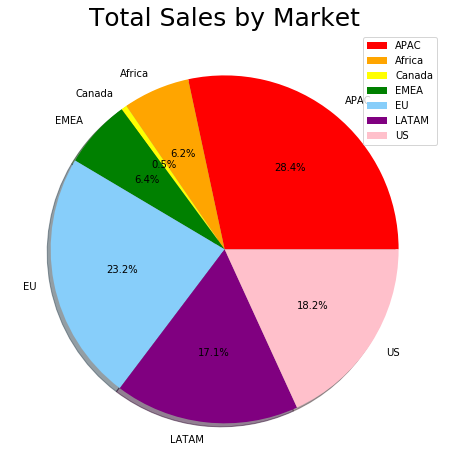

In [22]:
color=["red","orange","yellow","green","lightskyblue","purple","pink"]
plt.figure(figsize=(20,8))
plt.pie(x="Sales",data=market_sales_profit, 
        labels="Market", 
        shadow=True,
        autopct='%1.1f%%',
       colors=color)
plt.title("Total Sales by Market", fontsize=25)
plt.legend()

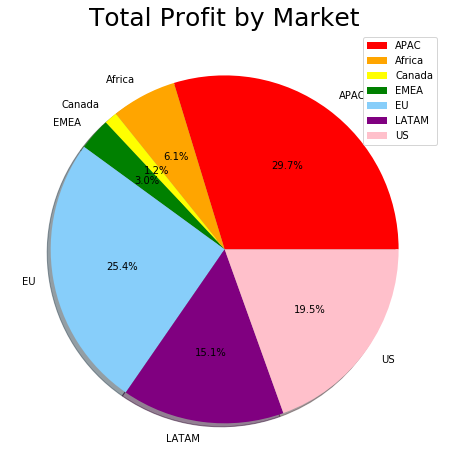

In [23]:
color=["red","orange","yellow","green","lightskyblue","purple","pink"]
plt.figure(figsize=(20,8))
plt.pie(x="Profit",data=market_sales_profit, 
        labels="Market", 
        shadow=True,
        autopct='%1.1f%%',
       colors=color)
plt.title("Total Profit by Market", fontsize=25)
plt.legend()

In [24]:
import plotly.graph_objects as go
import plotly.offline

import plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

top_sales = market_sales_profit.sort_values('Sales', ascending=False).head(20).sort_index()
#colormap = dict(zip(top_sales.Region.value_counts().index, py.tools.DEFAULT_PLOTLY_COLORS))
#top_sales['colors'] = top_sales.Region.map(colormap)
top_sales.iplot(
    kind='bubble', 
    x='Market', y='profit_rate', size='Sales', 
    title='Profit Rates of Top-20 Countries in Sales',
    yTitle='Profit Rates (%)',
    theme='solar') #colors=list(top_sales.colors)
    

Canada has has the highest profit rate

APAC has the highest sales/profit percentage compared to other region. Canada has the lowest percentage in terms of sells and profit. 

### How many orders from each market 

In [25]:
order_by_market=data["Market"].value_counts()
order_by_market

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

### Which market has the highest average sales per order? 

In [26]:
market_avg_sales=data.groupby("Market").agg({"Sales":np.mean}).reset_index().sort_values("Sales")
market_avg_sales

,Market,Sales
3,EMEA,160.302508
1,Africa,170.868370
2,Canada,174.292109
5,LATAM,210.278334
6,US,229.858001
4,EU,293.808906
0,APAC,325.917481


Text(0.5, 1.0, 'Average Sales by Market')

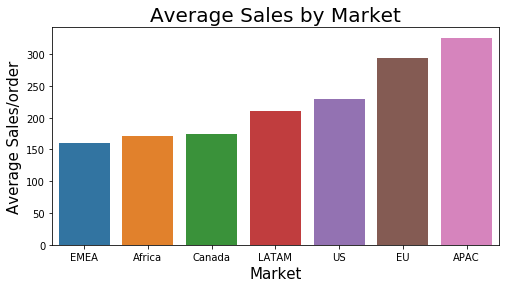

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(x="Market", y='Sales', data=market_avg_sales)
plt.xlabel("Market", fontsize=15)
plt.ylabel("Average Sales/order", fontsize=15)
plt.title("Average Sales by Market", fontsize=20)

# Sales Profit by Country

In [28]:
# distinct countries
country=data.Country.value_counts().head(20)
country

United States         9994
Australia             2837
France                2827
Mexico                2644
Germany               2065
China                 1880
United Kingdom        1633
Brazil                1599
India                 1555
Indonesia             1390
Turkey                1378
Italy                 1108
Nigeria                905
Spain                  859
Dominican Republic     742
El Salvador            736
Cuba                   724
Honduras               713
Philippines            681
New Zealand            628
Name: Country, dtype: int64

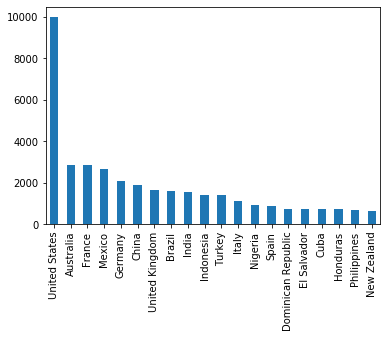

In [29]:
# plt.figure(figsize=(20,40))
# sns.countplot(y='Country', data=country)
country.plot(kind="bar")

In [30]:
#show the sales and profit data by country

sales_profit_by_country=data.groupby(["Market","Country"])['Sales','Profit'].sum().reset_index().sort_values('Sales', ascending=False).head(20)
sales_profit_by_country

,Market,Country,Sales,Profit
148,US,United States,2.297201e+06,286397.02170
1,APAC,Australia,9.252359e+05,103907.43300
113,EU,France,8.589311e+05,109029.00300
4,APAC,China,7.005620e+05,150683.08500
114,EU,Germany,6.288400e+05,107322.82050
140,LATAM,Mexico,6.225906e+05,102818.09752
6,APAC,India,5.896501e+05,129071.83500
123,EU,United Kingdom,5.285763e+05,111900.15000
7,APAC,Indonesia,4.048875e+05,15608.67790
127,LATAM,Brazil,3.611064e+05,30090.49896


In [31]:
sales_profit_by_country["profit_rate"]=sales_profit_by_country.Profit/sales_profit_by_country.Sales
sales_profit_by_country

,Market,Country,Sales,Profit,profit_rate
148,US,United States,2.297201e+06,286397.02170,0.124672
1,APAC,Australia,9.252359e+05,103907.43300,0.112304
113,EU,France,8.589311e+05,109029.00300,0.126936
4,APAC,China,7.005620e+05,150683.08500,0.215089
114,EU,Germany,6.288400e+05,107322.82050,0.170668
140,LATAM,Mexico,6.225906e+05,102818.09752,0.165146
6,APAC,India,5.896501e+05,129071.83500,0.218896
123,EU,United Kingdom,5.285763e+05,111900.15000,0.211701
7,APAC,Indonesia,4.048875e+05,15608.67790,0.038551
127,LATAM,Brazil,3.611064e+05,30090.49896,0.083329


Text(0.5, 1.0, 'Profit by Country')

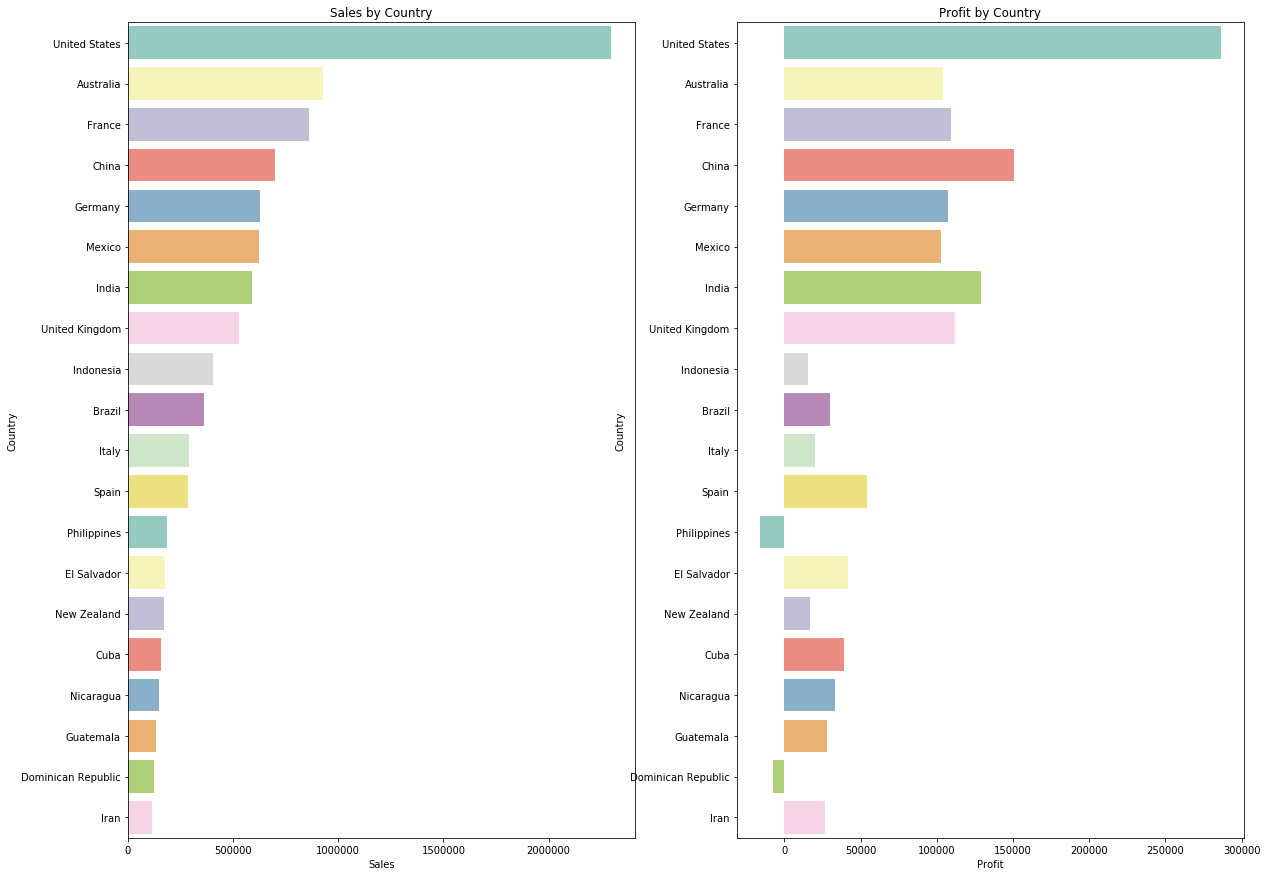

In [32]:
fig, axes=plt.subplots(1,2, figsize=(20,15))
sns.barplot(ax=axes[0], x="Sales", y="Country", data=sales_profit_by_country, palette="Set3")
sns.barplot(ax=axes[1], x="Profit", y="Country", data=sales_profit_by_country, palette="Set3")
axes[0].set_title("Sales by Country")
axes[1].set_title("Profit by Country")

Top five profit by country is: US, China, India, UK, France. 

As we can see, APAC Market had the highest average sales/order, following by EU and US. 

### Plot profit rate by country 

In [33]:
import random
x=random.randint(0,255)
print(x)

tuple = (20,50,30)
print(str(tuple))

158
(20, 50, 30)


In [34]:
newcolors =py.tools.DEFAULT_PLOTLY_COLORS

import random

for i in range(20):
    red = random.randint(0,255)
    green = random.randint(0,255)
    blue = random.randint(0,255)
    
    tuple = (red,green,blue)
    rgb = "rgb" + str(tuple)
    newcolors.append(rgb)
    
newcolors

['rgb(31, 119, 180)',
 'rgb(255, 127, 14)',
 'rgb(44, 160, 44)',
 'rgb(214, 39, 40)',
 'rgb(148, 103, 189)',
 'rgb(140, 86, 75)',
 'rgb(227, 119, 194)',
 'rgb(127, 127, 127)',
 'rgb(188, 189, 34)',
 'rgb(23, 190, 207)',
 'rgb(142, 28, 167)',
 'rgb(247, 81, 209)',
 'rgb(239, 97, 228)',
 'rgb(83, 210, 35)',
 'rgb(14, 143, 0)',
 'rgb(17, 144, 200)',
 'rgb(3, 190, 37)',
 'rgb(237, 2, 228)',
 'rgb(136, 111, 96)',
 'rgb(12, 27, 126)',
 'rgb(29, 193, 124)',
 'rgb(90, 62, 186)',
 'rgb(186, 254, 61)',
 'rgb(230, 143, 43)',
 'rgb(69, 5, 252)',
 'rgb(18, 65, 146)',
 'rgb(145, 127, 200)',
 'rgb(48, 101, 22)',
 'rgb(58, 145, 151)',
 'rgb(232, 25, 124)']

# Profit rate in by country, Sales and Market

In [104]:
#color: market
#Size: Sales
import plotly.offline as ply
import plotly.graph_objs as go
import plotly.express as px
#colors:
newcolors2=["#ff1493","#40e0d0","#00fa9a","#ee82ee","#4169e1"]
top_sales_country = sales_profit_by_country.sort_values('Sales', ascending=False).head(20).sort_index()
colormap = dict(zip(top_sales_country.Market.value_counts().index, newcolors2))

top_sales_country['colors'] = top_sales_country.Market.map(colormap)

fig=top_sales_country.iplot(
    kind='bubble', 
    x='Country', y='profit_rate',size='Sales',
    title='Profit Rates of Top-20 Countries in Sales',
    yTitle='Profit Rates', colors=list(top_sales_country.colors))



## which category/segment/product sold the most?

In [37]:
# Sales profit by Segment:
sale_by_segment=data.groupby("Segment").agg({"Sales":sum,"Profit":sum}).reset_index()
sale_by_segment

,Segment,Sales,Profit
0,Consumer,6.507949e+06,749239.78206
1,Corporate,3.824698e+06,441208.32866
2,Home Office,2.309855e+06,277009.18056


Text(0.5, 1.0, 'Profit by Segments')

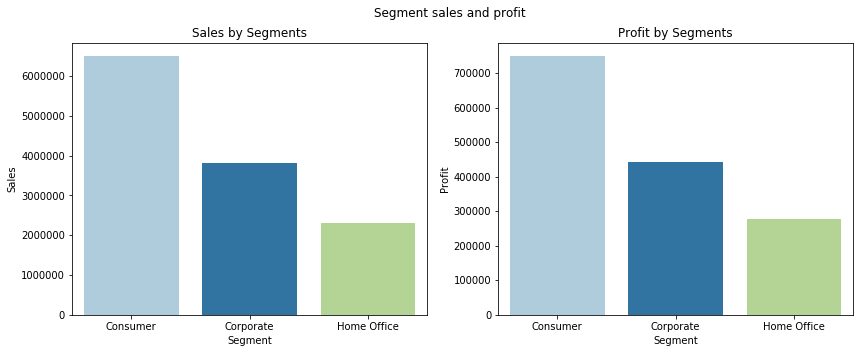

In [38]:
fig, axes=plt.subplots(1,2, figsize=(14,5))
fig.suptitle("Segment sales and profit")
sns.barplot(ax=axes[0],x="Segment", y="Sales", data=sale_by_segment, palette="Paired")
sns.barplot(ax=axes[1],x="Segment", y="Profit", data=sale_by_segment, palette="Paired")

axes[0].set_title("Sales by Segments")
axes[1].set_title("Profit by Segments")

Cosumer category has the highest sales and profit. Home Office Segment has the lowest sales and profit

In [39]:
# Sale and Profit by Category
Sale_by_Category=data.groupby("Category").agg({"Sales":sum, "Profit": sum}).reset_index().sort_values("Sales")
Sale_by_Category

,Category,Sales,Profit
1,Office Supplies,3.787070e+06,518473.83430
0,Furniture,4.110874e+06,285204.72380
2,Technology,4.744557e+06,663778.73318


Text(0.5, 1.0, 'Profit by Category')

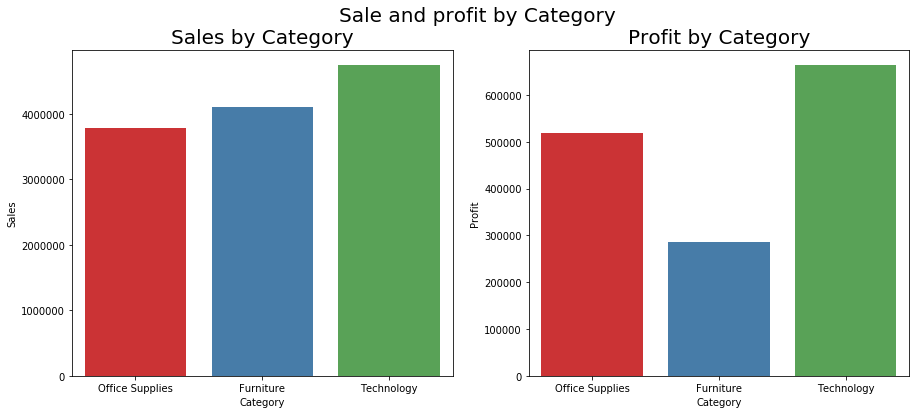

In [40]:
fig, axes=plt.subplots(1,2, figsize=(15,6))
sns.barplot(ax=axes[0],x="Category", y="Sales", data=Sale_by_Category, palette="Set1")
sns.barplot(ax=axes[1], x="Category", y="Profit", data=Sale_by_Category, palette="Set1")

fig.suptitle("Sale and profit by Category", fontsize=20)
axes[0].set_title("Sales by Category", fontsize=20)
axes[1].set_title("Profit by Category", fontsize=20)

Technology has the highest sales and profit among all three categories, following by Furniture, Office Supplies. 

In terms of profit, technologies has the highest category, following by office supplies, and furniture

In [41]:
# Sub-category sale and profit
sub_category_sales=data.groupby("Sub-Category").agg({"Sales":sum, "Profit":sum}).reset_index().sort_values('Sales')
sub_category_sales

,Sub-Category,Sales,Profit
10,Labels,7.340403e+04,15010.51200
8,Fasteners,8.324232e+04,11525.42410
7,Envelopes,1.709043e+05,29601.11630
15,Supplies,2.430742e+05,22583.26310
12,Paper,2.442917e+05,59207.68270
2,Art,3.720920e+05,57953.91090
9,Furnishings,3.855783e+05,46967.42550
3,Binders,4.619115e+05,72449.84600
0,Accessories,7.492370e+05,129626.30620
16,Tables,7.570419e+05,-64083.38870


Text(0.5, 1.0, 'Profit by category')

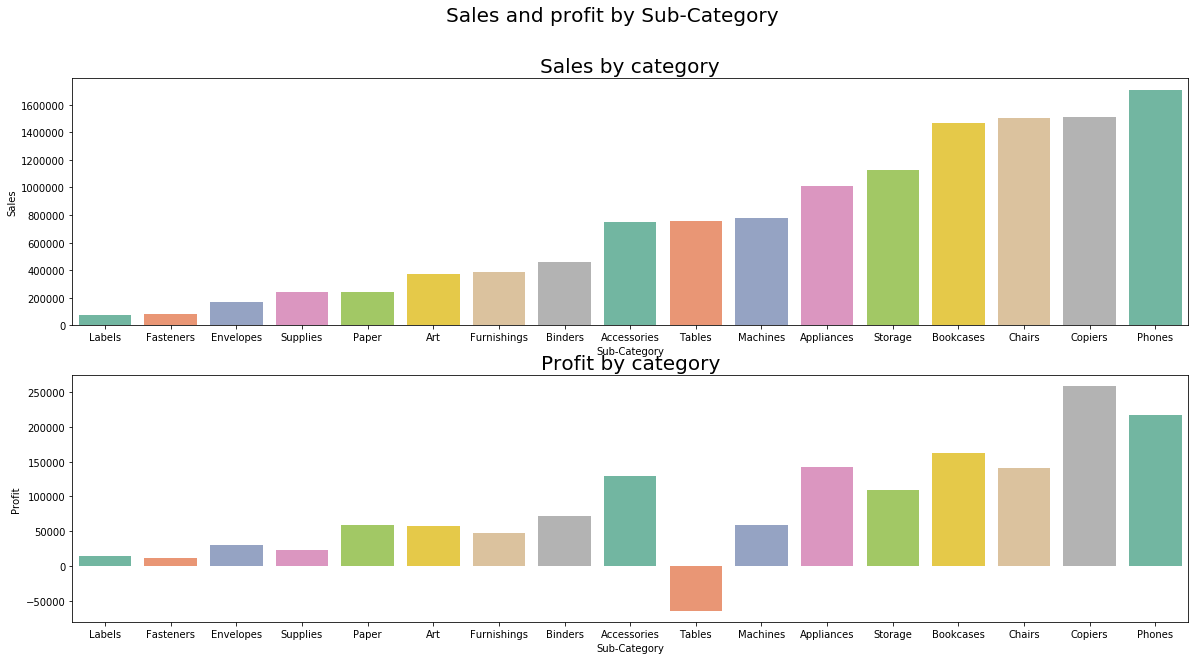

In [42]:
fig, axes=plt.subplots(2, 1, figsize=(20,10))
sns.barplot(ax=axes[0],x="Sub-Category",y="Sales", 
            data=sub_category_sales, 
            palette="Set2",
            order=sub_category_sales['Sub-Category'])
sns.barplot(ax=axes[1],x="Sub-Category", y="Profit", data=sub_category_sales, palette="Set2")

fig.suptitle("Sales and profit by Sub-Category",fontsize=20)
axes[0].set_title("Sales by category",fontsize=20)
axes[1].set_title("Profit by category",fontsize=20)

# US Market

In [43]:
Country=['United States']
US_data=data[data.Country.isin(Country)]
US_data.describe()

,Row_ID,Sales,Quantity,Discount,Profit,Shipping_Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,36293.500000,229.858001,3.789574,0.156203,28.656896,23.831678
std,2885.163629,623.245101,2.225110,0.206452,234.260108,58.962848
min,31297.000000,0.444000,1.000000,0.000000,-6599.978000,0.010000
25%,33795.250000,17.280000,2.000000,0.000000,1.728750,1.490000
50%,36293.500000,54.490000,3.000000,0.200000,8.666500,5.100000
75%,38791.750000,209.940000,5.000000,0.200000,29.364000,19.985000
max,41290.000000,22638.480000,14.000000,0.800000,8399.976000,933.570000


In [44]:
US_sales_profit=US_data.groupby(["Region","State"]).agg({"Sales":sum, "Profit": sum}).reset_index().sort_values("Sales",ascending=False).head(20)
US_sales_profit["Profit_rate"]=US_sales_profit["Profit"]/US_sales_profit["Sales"]
US_sales_profit

,Region,State,Sales,Profit,Profit_rate
39,West,California,457687.6315,76381.3871,0.166885
21,East,New York,310876.2710,74038.5486,0.238161
11,Central,Texas,170188.0458,-25729.3563,-0.151182
47,West,Washington,138641.2700,33402.6517,0.240929
23,East,Pennsylvania,116511.9140,-15559.9603,-0.133548
29,South,Florida,89473.7080,-3399.3017,-0.037992
0,Central,Illinois,80166.1010,-12607.8870,-0.157272
22,East,Ohio,78258.1360,-16971.3766,-0.216864
4,Central,Michigan,76269.6140,24463.1876,0.320746
37,South,Virginia,70636.7200,18597.9504,0.263290


In [45]:
colormap=dict(zip(US_sales_profit.Region.value_counts().index, newcolors))
US_sales_profit["colors"]=US_sales_profit.Region.map(colormap)

US_sales_profit.iplot(kind="bubble", 
                      x="State",
                      y="Profit_rate", 
                      size="Sales",
                      title="Profit rate by States and Region(United States)",
                      yTitle="profit rate",
                      color=list(US_sales_profit.colors)
                     )

Text(0.5, 1.0, 'Product Category by Region')

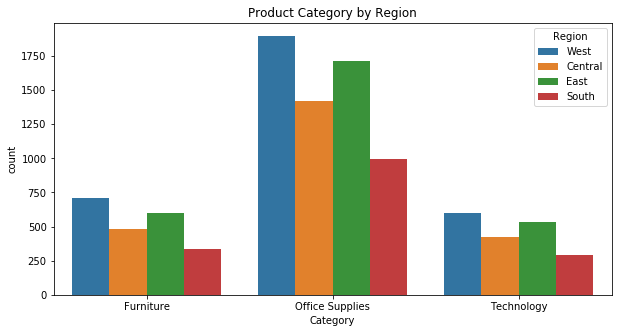

In [46]:
# In each region, which product category they purchase the most?
#US_product=US_data.groupby(["Region","Category"]).agg()

plt.figure(figsize=(10,5))
sns.countplot(x="Category", hue="Region", data=US_data)
plt.title("Product Category by Region")

In [47]:
US_by_year=US_data.groupby(Year).agg({"Sales":sum}).reset_index()
US_by_year

,Order_Date,Sales
0,2011,484247.4981
1,2012,470532.5090
2,2013,608473.8300
3,2014,733947.0232


In [48]:
#Extract year
data["Year"]=pd.DatetimeIndex(data["Order_Date"]).year
data["Month"]=pd.DatetimeIndex(data["Order_Date"]).month

In [49]:
list_2014=["2014"]
US_data_2014=US_data[data.Year.isin(list_2014)]
US_data_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319 entries, 13209 to 51289
Data columns (total 23 columns):
Row_ID            3319 non-null int64
Order_ID          3319 non-null object
Order_Date        3319 non-null datetime64[ns]
Ship_Date         3319 non-null datetime64[ns]
Ship_Mode         3319 non-null object
Customer_ID       3319 non-null object
Customer_Name     3319 non-null object
Segment           3319 non-null object
City              3319 non-null object
State             3319 non-null object
Country           3319 non-null object
Market            3319 non-null object
Region            3319 non-null object
Product_ID        3319 non-null object
Category          3319 non-null object
Sub-Category      3319 non-null object
Product_Name      3319 non-null object
Sales             3319 non-null float64
Quantity          3319 non-null int64
Discount          3319 non-null float64
Profit            3319 non-null float64
Shipping_Cost     3319 non-null float64
Order_Priori

/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [50]:
#2014 sales by Month
US_2014_Sales_by_Month=US_data_2014.groupby(Month).agg({"Sales":sum, "Profit":sum}).reset_index()
US_2014_Sales_by_Month

,Order_Date,Sales,Profit
0,1,58016.2488,9519.7930
1,2,44845.3254,4764.5993
2,3,80235.3360,14047.2219
3,4,43204.2416,2930.5848
4,5,47320.4404,1514.9084
5,6,48030.5177,8399.6258
6,7,40366.3518,5701.4371
7,8,74492.3475,7260.4549
8,9,77790.2180,12347.1450
9,10,76203.1362,9125.3986


Text(0, 0.5, 'Total Sales')

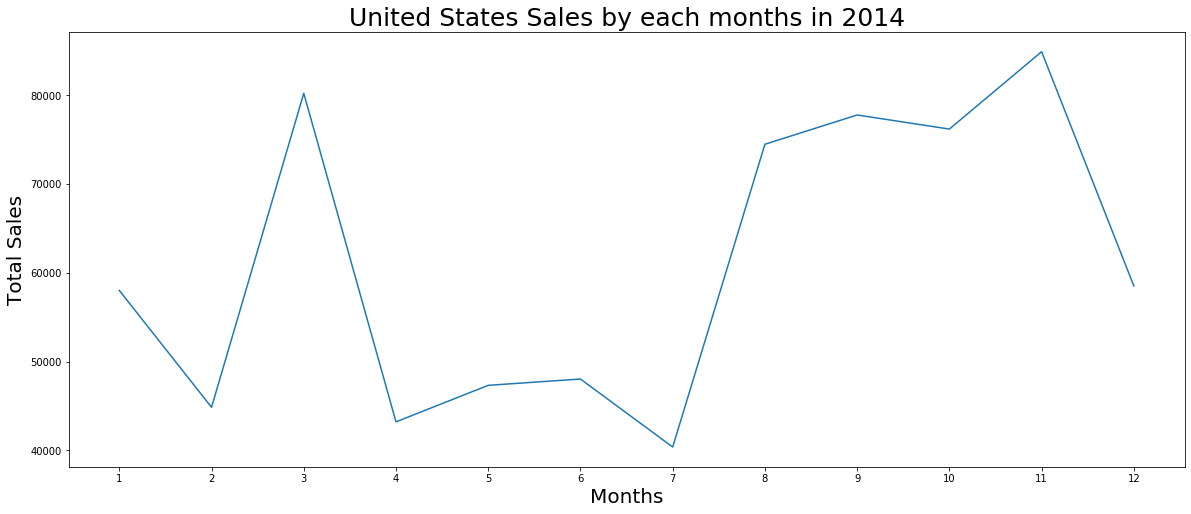

In [51]:
# plot
plt.figure(figsize=(20,8))
sns.lineplot(x="Order_Date", y="Sales", data=US_2014_Sales_by_Month)
plt.xticks(US_2014_Sales_by_Month["Order_Date"])
plt.title("United States Sales by each months in 2014",fontsize=25)
plt.xlabel("Months",fontsize=20)
plt.ylabel("Total Sales", fontsize=20)

Top 3 total sale/sub-category: Phones, Copiers, Chairs;

Top 3 total profit by categoy: Copiers, Phones, Bookcases